# Hand In 3 - Frequent patterns

Welcome to the handin on frequent patterns. 
This handin corresponds to the topics in Week 16--19 in the course.

The handin IS 
* done in groups of two people
* worth 10% of the grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

Submit both files on Blackboard no later than **May 22nd kl. 23.59**.

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is **80**. For the maximum grade you need to get at least _65 points_. The minimum grade (02 in the Danish scale)
requires **at least** 24 points, with at least 8 points on of the first three Parts (Part 1,2,3).
Good luck!

**The exercise types**: There are three different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-2 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Describe\]**</span> means to provide a potentially longer answer of 1-5 lines indicating the analysis of the data and the results. 
4. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
5. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). However, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient! 

In [1]:
import itertools
from itertools import combinations

import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import tabulate
from tqdm import tqdm

import sys
sys.path.append('./utilities')
# from load_data import load_dblp_citations

# Part 1: Subgraph mining (25 Points)
In this part, we will work with subgraph mining algorithms. We will first solve some theory exercises and then implement two simple algorithms. 

## Task 1.1 DFS codes (13 Points)

### Task 1.1.1 (6 Points)
<span style='color: green'>**\[Compute by hand\]**</span> Find the canonical (i.e., minimal) DFS code for the graph below. Try to eliminate some codes without generating the complete search tree. *Hint*: you can eliminate a code if you can show that it will have a larger code than some other code (e.g., using label ordering, degree). 

<div>
<img src="images/dfs-codes.png" width="300">
</div>

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>



******************

### Task 1.1.2 (4 Points)
<span style='color: green'>**\[Describe\]**</span> an extension to the DFS-code notation and the rules for the lexicographic ordering that handles the case of *directed* graphs. If that is not possible, state why.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.1.3 (3 Points)
 <span style='color: green'>**\[Describe\]**</span> (no need for pseudocode) a suitable way to find the _maximum_ DFS-code from the rules for _minimum_ DFS-codes that you already know from the lecture.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 1.2 Maximum Independent Set (12 Points)

### Task 1.2.1 (6 Points)
<span style='color: green'>**\[Describe\]**</span>  Sketch a proof that the Maximum Independent Set (MIS) support is anti-monotone, i.e., the support of a pattern $P'$ is no larger than _any_ pattern $P$ included in $P'$ (that is, $P$ is a sub-pattern of $P'$). To guide you into the proof, start from a set of matchings of the pattern $P'$ which corresponds to an independent set of nodes $I'$ in the overlap graph $G'_{O}$, same for the set of nodes $I$ in the overlap graph $G_O$ of $P$. Observe (_Observation 1_) that the **all** the matchings $f'$ of $P'$ contain matchings $f$ of $P$. Also observe (_Observation 2_) that if you take two matchings $f_1'$ and $f_2'$ of $P'$ and the corresponding matchings $f_1$ and $f_2$ of $P$ overlap, so do the matchings $f_1'$ and $f_2'$. Given these two observation what can you deduce on the independent sets $I'$ of $G'_O$ and $I$ of $G_O$?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>

Given Observation 1 (all matchings of $P'$ contain matchings of $P$), any independent set of matches in $P'$ will contain an independent set of matches in $P$. With Observation 2 (overlapping matchings of $P$ lead to overlapping matchings of $P'$), we infer that overlapping in $P$ precludes independent sets in $P'$. Therefore, any independent set in $P'$ corresponds to an independent set in $P$, but not all independent sets in $P$ correspond to those in $P'$. This shows the Maximum Independent Set (MIS) support is anti-monotone: the support of $P'$ cannot exceed the support of $P$.

******************

### Task 1.2.2 (6 Points)

<span style='color: green'>**\[Implement\]**</span> In this exercise, we will program a simplified version of the Maximum Indepent Set (MIS) support. Your exercise is to construct an algorithm that takes in input a pattern $P$ and the matches of the pattern in the graph $G$ and finds the Maximum Independent Set (MIS) support. Since finding the MIS is NP-hard your exercise is to implement a simple greedy approximation  algorithm. To test the code you can use the graph and code below. 

In [2]:
def mis_support(P, matches): 
    """
    Returns the MIS support of a pattern. 

    Parameters
    ----------
    P:       The pattern represented as a networkx undirected graph object
    matches: A list of subgraph isomorphic matches. Each match is a dictionary id_node_pattern -> id_node_graph
    """
    mis = 0
    ### YOUR CODE HERE

    # Initialize an empty list to store the selected matches
    selected_matches = []

    # Sort the matches based on their length (smaller length first)
    matches.sort(key=len)

    for match in matches:
        # Check if the current match intersects with any of the previously selected matches
        if not any(set(match.keys()).intersection(set(m)) for m in selected_matches):
            selected_matches.append(list(match.keys()))

    # The MIS support is the number of selected matches
    mis = len(selected_matches)

    ### YOUR CODE HERE
    return mis

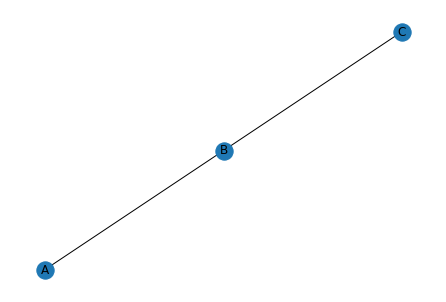

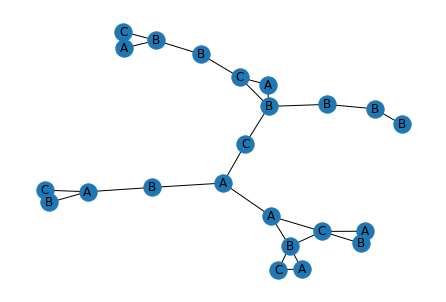

{1: 1, 2: 2, 3: 3}
{1: 1, 2: 2, 5: 3}
{8: 1, 9: 2, 10: 3}
{11: 1, 12: 2, 10: 3}
{11: 1, 12: 2, 13: 3}
{14: 1, 12: 2, 13: 3}
{14: 1, 12: 2, 10: 3}
{17: 1, 16: 2, 15: 3}
{21: 1, 19: 2, 20: 3}
The MIS support for pattern [1, 2, 3] in G is: 5.000000


In [3]:
from networkx.algorithms import isomorphism

# Example pattern
P = nx.Graph()
P.add_nodes_from([(1,{"label":"A"}), (2,{"label":"B"}), (3,{"label":"C"})])
P.add_edges_from([(1,2),(2,3)])
labels = nx.get_node_attributes(P, 'label') 
plt.figure(1)
nx.draw(P,labels=labels)

# Example graph
G = nx.read_gml("data/graph.gml", label='id')
labels = nx.get_node_attributes(G, 'label') 
pos = nx.spring_layout(G)
plt.figure(2)
nx.draw(G,pos, labels=labels)

plt.show()

# Find the matches of P in G
nm = isomorphism.GraphMatcher(G,P,node_match=isomorphism.categorical_node_match("label", "A"))
matches = []
for subgraph in nm.subgraph_monomorphisms_iter():
    matches.append(subgraph)
    print(subgraph)
    
print("The MIS support for pattern %s in G is: %f" %(P.nodes, mis_support(P, matches)))


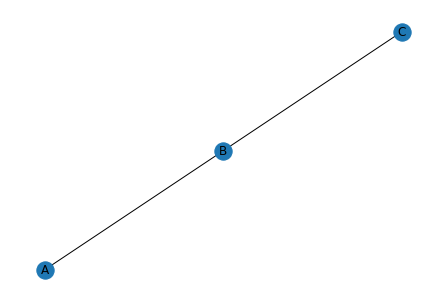

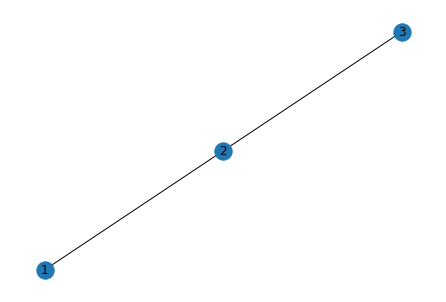

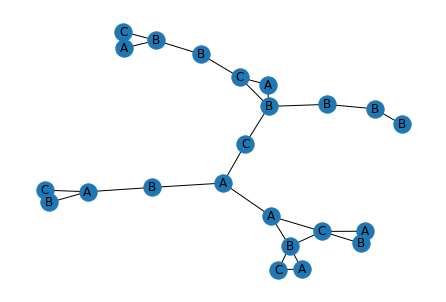

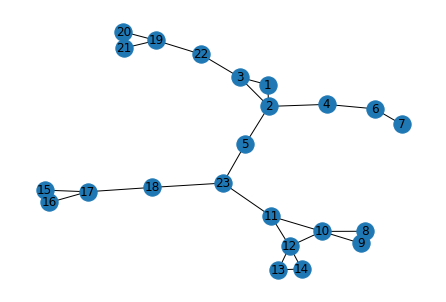

[{1: 1, 2: 2, 3: 3},
 {1: 1, 2: 2, 5: 3},
 {8: 1, 9: 2, 10: 3},
 {11: 1, 12: 2, 10: 3},
 {11: 1, 12: 2, 13: 3},
 {14: 1, 12: 2, 13: 3},
 {14: 1, 12: 2, 10: 3},
 {17: 1, 16: 2, 15: 3},
 {21: 1, 19: 2, 20: 3}]

In [4]:
### EXTRA CODE BLOCK HERE

# We will plot the graphs with their number of nodes as labels to better see the matches of subgraphs

# Lock the positions of the nodes in the graph P
positions = {1: (0, 0), 2: (1, 1), 3: (2, 2)}


# Draw the pattern graph with node labels
plt.figure(1)
labels_P = nx.get_node_attributes(P, 'label')
nx.draw(P, positions, with_labels=True, labels=labels_P)

# Draw the pattern graph without node labels
plt.figure(2)
labels_P = nx.get_node_attributes(P, 'label')
nx.draw(P, positions, with_labels=True)

# Draw the main graph with node labels
plt.figure(3)
labels_G = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, labels=labels_G)

# Draw the main graph without node labels
plt.figure(4)
labels_G = nx.get_node_attributes(G, 'label')
nx.draw(G, pos, with_labels=True)

plt.show()

# Print the matches
matches


*******************
<span style="color:red">**YOUR ANSWER HERE**</span>

Thus, looking at the matches and the two graphs, we are able to verify that our function above returns the correct MIS support for the given pattern in G.

******************

# Part 2: Frequent itemsets (25 Points)
We have learned the Apriori and FP-Growth algorithms for mining frequent itemsets. In this part, we will implement these algorithms and test them against each other. 

We will use the anonymized real-world `retail market basket` data from: http://fimi.ua.ac.be/data/.
This data comes from an anonymous Belgian retail store, and was donated by Tom Brijs from Limburgs Universitair Centrum, Belgium. The original data contains 16,470 different items and 88,162 transactions. You may only work with the top-50 items in terms of occurrence frequency.
_Hint:_ We have used this dataset before.

The variable **retail_small** contains the top-50.

In [5]:
from load_data import load_market_basket


def filter_transactions(T, k=50):
    """
        Keep only the top k items in the transactions.
        Remove transactions that become empty.
    """
    # Count occurences of each item
    counts = [0] * 16470
    for t in T:
        for i in t:
            counts[i] += 1

    # Sort and select top k
    counts = np.array(counts)
    order  = np.argsort(counts)[::-1] # reverse the sorted order

    indexes_to_keep = order[:k]       # Keep the top k items
    index_set = set(indexes_to_keep)  # Convert to python set for efficiency

    # Filter transactions
    T_new = [t_ for t_ in  [list(filter(lambda i: i in index_set, t)) for t in T]  if t_]
    return T_new

retail = load_market_basket()
retail_small = filter_transactions(retail)

## Task 2.1 Association Rules (4 Points)
Consider the following table

| transaction ID 	| Items           	|
|----------------	|-----------------	|
| 1              	| Ape,Cat,Dog,Cow   |
| 2              	| Cat,Dog,Pig,Cow 	|
| 3              	| Dog,Bat,Pig,Cow 	|
| 4              	| Dog,Pig,Cow     	|
| 5              	| Dog,Cow         	|
| 6              	| Cat,Cow         	|
| 7              	| Ape,Bat,Fox     	|
| 8              	| Ape,Cow         	|
| 9              	| Ape,Dog,Cow     	|


### Task 2.1.1 (0.5 Points)
<span style='color: green'>**\[Motivate\]**</span> What is the count of the itemset {Dog,Pig,Cow} ?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>

From the given table above, the itemset {Dog, Pig, Cow} appears together in the following transactions:

Transaction 2, Transaction 3, Transaction 4

So, the count of the itemset {Dog, Pig, Cow} is 3.

******************

### Task 2.1.2 (0.5 Points)
<span style='color: green'>**\[Motivate\]**</span>What is the support and confidence of the association rule {Dog,Pig}->Cow ?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>

Association rules: We have that for $X \to Y$, the support is defined as the fraction of transactions that contain both $X$ and $Y$ ($P(X,Y)$), and the confidence is measured how often $Y$ appears in transactions that contain $X$ ($P(Y|X)$).

And so we have that:

The support of the rule {Dog, Pig} -> Cow is the proportion of transactions containing {Dog, Pig, Cow}. There are 3 such transactions (2, 3, 4) out of 9 total, so the support is 3/9 = 0.33.

The confidence of the rule {Dog, Pig} -> Cow is the proportion of {Dog, Pig} transactions that also contain Cow. All 3 transactions with {Dog, Pig} (2, 3, 4) also contain Cow, so the confidence is 3/3 = 1.00. 

Therefore, the support is 0.33 and the confidence is 1.00 for the rule {Dog, Pig} -> Cow.

******************

### Task 2.1.3 (1.5 Point)
<span style='color: green'>**\[Compute by hand\]**</span> Consider the application of the Apriori algorithm to find all the frequent itemsets
whose counts are at least 3.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>

The algorithm works in multiple passes, where in each pass it generates new candidate itemsets of a certain size, and then counts the occurrences of those itemsets in the transaction data.

Let's apply the Apriori algorithm to the given dataset to find itemsets with a minimum count of 3. While generating candidate itemsets, we only consider combinations of itemsets that were found to be frequent in the previous step. This is the key idea behind the Apriori algorithm - if an itemset is infrequent, then all its supersets will also be infrequent. This principle allows the algorithm to significantly reduce the number of candidate itemsets it needs to consider. For an itemset to be considered as a candidate, all of its subsets should be frequent. If any subset is not frequent, then by the Apriori principle, the larger set cannot be frequent either.

Step 1: Find frequent itemsets of size 1:

- Count(Ape) = 4
- Count(Cat) = 3
- Count(Dog) = 6
- Count(Cow) = 8
- Count(Pig) = 3
- Count(Bat) = 2
- Count(Fox) = 1

Step 2: Generate candidate itemsets of size 2 from the frequent itemsets of size 1:

- {Ape, Cat}, {Ape, Dog}, {Ape, Cow}, {Ape, Pig}
- {Cat, Dog}, {Cat, Cow}, {Cat, Pig}
- {Dog, Cow}, {Dog, Pig}
- {Cow, Pig}

Step 3: Find frequent itemsets of size 2:

- Count({Ape, Cat}) = 1
- Count({Ape, Dog}) = 2
- Count({Ape, Cow}) = 3
- Count({Ape, Pig}) = 0
- Count({Cat, Dog}) = 2
- Count({Cat, Cow}) = 3
- Count({Cat, Pig}) = 1
- Count({Dog, Cow}) = 6
- Count({Dog, Pig}) = 3
- Count({Cow, Pig}) = 3

Step 4: Generate candidate itemsets of size 3 from the frequent itemsets of size 2:

- {Ape, Dog, Cow}, {Cat, Dog, Cow}, {Dog, Cow, Pig}

Step 5: Find frequent itemsets of size 3:

- Count({Dog, Cow, Pig}) = 3

So, the frequent itemsets with a minimum count of 3 are:

- {Ape}, {Cat}, {Dog}, {Cow}, {Pig}
- {Ape, Cow}, {Cat, Cow}, {Dog, Cow}, {Dog, Pig}, {Cow, Pig}
- {Dog, Cow, Pig}

******************

### Task 2.1.4 (1.5 Point)
<span style='color: green'>**\[Compute by hand\]**</span> Find all the association rules with support at least 1/3 and confidence at least 1/2.


*******************
<span style="color:red">**YOUR ANSWER HERE**</span>

From these frequent itemsets, we can create association rules. For a rule $A \to B$, we calculate the support as count(A U B) / total transactions, and the confidence as count(A U B) / count(A).

Remember that we have a total of 9 transactions, so to have a support of at least 1/3, we need the itemset to appear in at least 3 transactions. To have a confidence of at least 1/2, at least half of the transactions with A should also contain B. And so we may use the frequent itemsets found in the previous exercise to create the relevant association rules. 

Here are the frequent itemsets we have:

Singletons count: {Ape} = 4, {Cat} = 3, {Dog} = 6, {Cow} = 8, {Pig} = 3\
Pairs count: {Ape, Cow} = 3, {Cat, Cow} = 3, {Dog, Cow} = 6, {Dog, Pig} = 3, {Cow, Pig} = 3\
Triples count: {Dog, Cow, Pig} = 3

As the singletons are contained in the pairs and triples, we can ignore them when creating the rules, and thus we want to start with the pairs and then look at the triples. But we will still use the count of the singletons when support and confidence in the pairs.

From the pairs:

- {Ape, Cow}:
    - Ape->Cow: support=3/9, confidence=3/4. The rule meets the criteria.
    - Cow->Ape: support=3/9, confidence=3/8. The rule meets the criteria.
- {Cat, Cow}:
    - Cat->Cow: support=3/9, confidence=3/3. The rule meets the criteria.
    - Cow->Cat: support=3/9, confidence=3/8. The rule does not meet the criteria.
- {Dog, Cow}:
    - Dog->Cow: support=6/9, confidence=6/6. The rule meets the criteria.
    - Cow->Dog: support=6/9, confidence=6/8. The rule meets the criteria.
- {Dog, Pig}:
    - Dog->Pig: support=3/9, confidence=3/6. The rule meets the criteria.
    - Pig->Dog: support=3/9, confidence=3/3. The rule meets the criteria.
- {Cow, Pig}:
    - Cow->Pig: support=3/9, confidence=3/8. The rule does not meet the criteria.
    - Pig->Cow: support=3/9, confidence=3/3. The rule meets the criteria.

From the triple:

- {Dog, Cow, Pig}:
    - Dog, Cow -> Pig: support=3/9, confidence=3/6. The rule meets the criteria.
    - Dog, Pig -> Cow: support=3/9, confidence=3/3. The rule meets the criteria.
    - Cow, Pig -> Dog: support=3/9, confidence=3/3. The rule meets the criteria.
    - Dog -> Cow, Pig: support=3/9, confidence=3/6. The rule meets the criteria.
    - Cow -> Dog, Pig: support=3/9, confidence=3/8. The rule does not meet the criteria.
    - Pig -> Dog, Cow: support=3/9, confidence=3/3. The rule meets the criteria.
    
So these are all the association rules with support at least 1/3 and confidence at least 1/2.

******************

## Task 2.2 A Priori algorithm (9 Points)

### Task 2.2.1(7 Points)
<span style='color: green'>**\[Implement\]**</span> Develop an implementation of the Apriori algorithm. You can look at your implementation from the exercises (note that this one is slightly different to simplify comparison with FP-Growth).

In [7]:
def apriori_algorithm(T, min_support=10):
    """
        Apriori algorithm for mining frequent itemsets and association rules. 
        This implementation should just find frequent itemsets, and ignore the rule generation.
        Inputs:
            T:               A list of lists, each inner list will contiain integer-item-ids. 
                             Example: T = [[1, 2, 5], [2, 3, 4], [1, 6]]
            min_support:     int: The total number of occurences needed for an itemset to be considered frequent
        
        Outputs:
            itemsets:        Dictionary of with keys as frequent itemset, and value as the total count of this itemset 
    """
    itemsets = dict()
    ### TODO Your code here

    # Compute the frequency of each item
    C1 = dict()
    for transaction in T:
        for item in transaction:
            if item not in C1:
                C1[item] = 1
            else:
                C1[item] += 1
    
    # Keep only the items that have a frequency >= min_support
    L1 = {item: count for item, count in C1.items() if count >= min_support}
    itemsets.update(L1)
    
    # Compute candidate itemsets of size 2 from the frequent items of size 1
    prev_itemset = {tuple([item]) for item in L1.keys()}
    
    while prev_itemset:
        # Compute candidates
        Ck = compute_candidates(prev_itemset)
        # Count the frequency of each candidate
        count_Ck = {item: 0 for item in Ck}
        for transaction in T:
            for item in Ck:
                if set(item).issubset(set(transaction)):
                    count_Ck[item] += 1
        # Keep only the itemsets that have a frequency >= min_support
        Lk = {item: count for item, count in count_Ck.items() if count >= min_support}
        itemsets.update(Lk)
        prev_itemset = set(Lk.keys())
        
    ### TODO Your code here

    return itemsets

def compute_candidates(prev_itemset):
    Ck = set()
    # Join step
    for itemset in prev_itemset:
        its1 = tuple(sorted(itemset))
        for itemset2 in prev_itemset:
            its2 = tuple(sorted(itemset2))
            if its1[:-1] == its2[:-1]:
                if its1[-1] < its2[-1]: Ck.add(its1 + its2[-1:])

    # Pruning step
    to_remove = set()
    for c in Ck:
        for subset in combinations(c, len(c)-1):
            if not subset in prev_itemset:
                to_remove.add(c)
                break
    for c in to_remove:
        Ck.remove(c)
    
    return Ck

### Task 2.2.2 (2 Points)
<span style='color: green'>**\[Implement\]**</span> Run Apriori on the data-set (using the **retail** variable and not the small one). Try a few different values of min_support. </br>
<span style='color: green'>**\[Describe\]**</span>Roughly how large does min_support need to be before no itemsets of size 2 are found? (You don't need to find the excact value. Nearest 1000 is fine).

Note that the dataset is reasonably large, so this **can take up a large amount of time depending on your value of min support and implementation.**

In [8]:
apriori_algorithm(retail, 5000)

{32: 15167,
 38: 15596,
 39: 50675,
 41: 14945,
 48: 42135,
 (38, 39): 10345,
 (38, 48): 7944,
 (32, 39): 8455,
 (41, 48): 9018,
 (32, 48): 8034,
 (39, 41): 11414,
 (39, 48): 29142,
 (32, 39, 48): 5402,
 (39, 41, 48): 7366,
 (38, 39, 48): 6102}

******************
<span style="color:red">**YOUR ANSWER HERE**</span>

As seen from the output above, for this dataset, we need the min_support to be 29143 to not find any itemsets of size 2. Therefore, a prettier numer within the nearest 1000 above the minimum, is 29500.

******************

## Task 2.3 FP-Growth (9 Points)

### Task 2.3.1 (7 Points)
<span style='color: green'>**\[Implement\]**</span> Complete the implementation of FP-Growth below. You only need to implement growing the tree and building the header table. It is clearly marked where you need to implement.

In [114]:

class FP_Tree:
    def __init__(self, T, min_support=10):
        """
        Constructor for FP_Tree. Should correctly build an FP-Tree with header table.
        Hint: I strongly advise you to implement the missing sections of the Node class before this one
        
        Inputs:
            T:               A list of lists, each inner list will contiain integer-item-ids. 
                             Example: T = [[1, 2, 5], [2, 3, 4], [1, 6]]
            min_support:     The total number of occurences needed to keep the itemset.
        """
        self.min_support    = min_support
        self.header_table   = {}
        self.root           = Node(header_table = self.header_table)
        
        ### YOUR CODE HERE

        # Compute frequency of each item in the transactions
        item_freq = {}
        for transaction in T:
            for item in transaction:
                if item not in item_freq:
                    item_freq[item] = 1
                else:
                    item_freq[item] += 1
        
        # Filter out items with frequency less than min_support
        # We do this as an optimization, as these items will never be part of a frequent itemset
        item_freq = {item: freq for item, freq in item_freq.items() if freq >= min_support}
        
        # Sort transactions by frequency and filter out infrequent items
        # This ensures that items in each transaction are in descending order of frequency
        sorted_T = []
        for transaction in T:
            sorted_trans = sorted([item for item in transaction if item in item_freq],
                                  key=lambda item: (-item_freq[item], item))
            if sorted_trans:
                sorted_T.append(sorted_trans)
        
        # Build the FP-tree
        # For each transaction, we add a path to the tree
        for transaction in sorted_T:
            self.root.add_path(transaction)
        
        ### YOUR CODE HERE
    
    
    ### Common functions for FP-tree and Conditional FP-tree
    ### You do not need to modify the rest of this class
    def generate_pattern(self, keys, support):
        return tuple(keys + self.get_suffix()), support
    
    def get_suffix(self):
        return []
    
    # This is the main function for generating frequent itemsets. You do not need to modify this,
    # but I recommend reading and trying to understand it.
    def mine_frequent_itemsets(self, res=None):
        if res is None: res = []
        
        if self.root.is_single_path():
            keys = list(self.header_table.keys())
            key_idx = {k:i for i, k in enumerate(keys)}
            counts = [self.header_table[k].count for k in keys]
            
            for key_pair in itertools.chain(*[itertools.combinations(keys, k) for k in range(1, len(keys)+1)]):
                support = min([counts[key_idx[k]] for k in key_pair])
                if support >= self.min_support: 
                    res.append(self.generate_pattern(list(key_pair), support))
         
        else: # Not single path
            for key, node in self.header_table.items():
                support = node.support()
                
                if support >= self.min_support:
                    res.append( self.generate_pattern([key], support) )
                
                basis = []
                while node is not None:
                    curr_node = node
                    node = node.nodelink
                    
                    if curr_node.parent is None:  continue
                        
                    path = curr_node.path(limit=curr_node.count)[:-1]
                    if len(path) == 0:  continue
                        
                    basis.append( path )
                    
                if len(basis) == 0: continue
                    
                conditional_tree = Conditional_FP_Tree(self.min_support, [key] + self.get_suffix(), basis)
                if conditional_tree.root is None: continue
                    
                conditional_tree.mine_frequent_itemsets(res=res)
        return res


# You don't need to modify anything in this class
class Conditional_FP_Tree(FP_Tree):
    def __init__(self, min_support, suffix, basis): 
        self.min_support    = min_support
        self.suffix         = suffix
        self.header_table   = {} # This will hold all unique items
        
        self.root           = Node(header_table=self.header_table)
        
        self.build_tree(basis)
        # self.root           = prune(self.root, min_support)
        if self.root is None: print("WARNING: root is empty after pruning")
        
    def build_tree(self, basis):
        for b in basis:
            count = b[0][1]
            path = list(map(lambda x: x[0], b))
            for i in range(count):
                self.root.add_path(path)
    
    def get_suffix(self):
        return self.suffix

class Node:
    def __init__(self, header_table, value=None, parent=None, path=None):
        """
        Constructor for Node class, which is used for the FP-Tree. 
        Inputs:
            header_table:    Dict. Should be same dict for all nodes in the tree
            value:           Integer id of the item the node represents
            parent:          Parent Node. None if root node
            path:            List of node values for a path that should start in this node.
        """
        
        self.children     = {}
        self.header_table = header_table 
        self.nodelink     = None
        self.value        = None
        self.parent       = None
        self.count        = 0
        
        if value is not None: # Only root node should have None as value
            self.value          = value
            self.parent         = parent
            # YOUR CODE HERE

            # If this value already exists in the header table, add this node
            # to the end of the linked list of nodes with the same value
            if self.value in self.header_table:
                # Link this node to the previous node with the same value
                node = self.header_table[self.value]
                while node.nodelink is not None:
                    node = node.nodelink
                node.nodelink = self
            else:
                # Otherwise, add this node to the header table
                self.header_table[self.value] = self

            # YOUR CODE HERE
        
        if path is not None: 
            self.add_path(path)
            
    
    def add_path(self, path):
        """
        Function for adding a path to tree. 
        Should follow an existing path and increment count while such a path exists. 
        If no path exists (or only partial path exists), this function should create or complete such a path
        Hint: Recursion might be helpful.
        Inputs:
            path:            A list node values. 
                             Example: path = [1, 2, 5]
        """
        
        ### YOUR CODE

        # Increment the count of transactions represented by this (partial) path
        self.count += 1

        if path:
            # If there are items left in the path
            child_value = path[0]
            # If the next item in the path is not a child of this node, create a new child node for that item
            if child_value not in self.children:
                self.children[child_value] = Node(header_table=self.header_table,
                                                   value=child_value,
                                                   parent=self)

            # Order the children of the node based on their count
            self.children = dict(sorted(self.children.items(), key=lambda item: -item[1].count))    
            
            # Add the rest of the path to the child node
            self.children[child_value].add_path(path[1:])
        
        ### YOUR CODE
    
    
    # Functions for frequent items-sets and rule mining below. You do not need to modify these
    def is_single_path(self):
        if   len(self.children) == 0: return True 
        elif len(self.children) >  1: return False
        else:  # len == 1
            key = next((k for k in self.children.keys()))
            return self.children[key].is_single_path()
    
    def support(self, verbose=False):
        if verbose: print("Counting support, this value is ", self.value, " with count ", self.count, " and parent ", self.parent.value)
            
        if self.nodelink is not None: return self.count + self.nodelink.support(verbose)
        else:                         return self.count
    
    def path(self, limit=-1):
        if self.value is None: 
            return []
        else:                  
            count = self.count if limit == -1 else min(self.count, limit)
            return self.parent.path(limit=limit) + [(self.value, count)]
    
    def print(self, indent="", spacing="----|-"):
        print(indent + str(self.value) + ":" + str(self.count))
        for v in self.children.values():
            v.print(indent=indent + spacing)
            



In [115]:
### YOUR TEST CODE HERE

# Test dataset
T = [['B', 'A'], ['B', 'A', 'C'], ['A'], ['A', 'C', 'B'], ['C', 'B', 'A'], ['A', 'C', 'B'], ['C', 'B', 'A'], ['A', 'C', 'B'], ['C', 'A'], ['C', 'A', 'B'], ['A', 'B', 'C'], ['C', 'B', 'A'], ['C'], ['A'], ['C', 'B'], ['A', 'B']]
min_support = 10

tree = FP_Tree(T, min_support=min_support)
frequent_itemsets = tree.mine_frequent_itemsets()
print(frequent_itemsets)

# Compare it to Apriori
itemsets = apriori_algorithm(T, min_support=min_support)
print(itemsets)

[(('A',), 14), (('B',), 12), (('A', 'B'), 11), (('C',), 12), (('A', 'C'), 10), (('B', 'C'), 10)]
{'B': 12, 'A': 14, 'C': 12, ('B', 'C'): 10, ('A', 'B'): 11, ('A', 'C'): 10}


Thus, we see that the FP-Growth algorithm that we implemented produces the same result as the Apriori algorithm.

### Task 2.3.2 (2 Points)
<span style='color: green'>**\[Implement\]**</span> Run FP-Growth on the data-set (using the **retail** variable and not the small one). Try a few different values of min_support. </br>
<span style='color: green'>**\[Describe\]**</span> Roughly how large does min_support need to be before all itemsets of size 1 and 2 are found but no itemsets of size 3? (You don't need to find the excact value. Nearest 1000 is fine)

In [116]:
### YOUR CODE HERE

# Create an FP tree with a minimum support of 10
tree = FP_Tree(retail, min_support=5000)

# Mine frequent itemsets
frequent_itemsets = tree.mine_frequent_itemsets()

# Sort the frequent itemsets by size of itemset and item id
frequent_itemsets = sorted(frequent_itemsets, key=lambda x: (len(x[0]), x[0]))

# Print the frequent itemsets
for itemset in frequent_itemsets:
    print(f"{itemset[0]}: {itemset[1]}")

(32,): 15167
(38,): 15596
(39,): 50675
(41,): 14945
(48,): 42135
(39, 32): 8455
(39, 38): 10345
(39, 41): 11414
(39, 48): 29142
(48, 32): 8034
(48, 38): 7944
(48, 41): 9018
(39, 48, 32): 5402
(39, 48, 38): 6102
(39, 48, 41): 7366


******************
<span style="color:red">**YOUR ANSWER HERE**</span>

We are not entierly sure how to understand this **Describe** question, as it asks us to find one min_support number, such that, of itemsets of size 1 and 2 are found, but none of the size 3 are found. Then this is not possible, as the itemsets of size 1 and 2 are subsets of the itemsets of size 3. Therefore, if we find all itemsets of size 1 and 2, we will also find all itemsets of size 3.

However, if the question is to be understood as the one from the Apriori task "Roughly how large does min_support need to be before no itemsets of size 2 are found?" just with itemsets of size 3 instead of 2, then the answer is 7367, as seen above. And then again, we can just say 7500 for having a nice number within the range of 1000 from the actual minimum number.

******************

## Task 2.4 Comparing A priori and FP-Growth (3 Points)
<span style='color: green'>**\[Describe\]**</span> Run the given experiment and show to what extent FP-Growth has an advantage. Comment on the results. What do you see? What do you expect to see?

In [118]:
# Script for testing the runtime of your algorithms. 
# WARNING: This will take a reasonably long time to run.

import numpy as np
import time
    
def sample(n=200, alphabet_size=5):
    candidates  = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])[:alphabet_size]
    m = candidates.shape[0]
    
    T = []
    for i in range(n):
        size = int(np.random.rand() * (m)) + 1
        T.append(list(candidates[np.random.permutation(m)[:size]]))
        
    return T

def test():
    # If you want to test it quickly, you can modify "transaction_lengths" and "alphabet_sizes" temporarily. 
    # This will give you errors in the plotting (next code cell) though.
    # Make sure you use the original values for "transaction_lengths" and "alphabet_sizes" for your final version.
    transaction_lengths = [2**i for i in range(4, 11)]
    alphabet_sizes      = [3, 6, 9, 12] 
    
    min_support = 10
    repeats     = 10
    
    stop = False
    results = np.zeros((len(transaction_lengths), len(alphabet_sizes), 2))
    stderrs = np.zeros((len(transaction_lengths), len(alphabet_sizes), 2))
    
#     print(results.shape)
    
    for i, n in enumerate(transaction_lengths):
        for j, a in enumerate(alphabet_sizes):
            print(" - - " * 4, "n=%d,a=%d" % (n, a), " - - " * 4)
            times = []
            for _ in range(repeats):
                T = sample(n, a)

                t0 = time.time()
                tree = FP_Tree(T, min_support=min_support)
                frequent_itemsets = tree.mine_frequent_itemsets()
                t1 = time.time() - t0

                i1 = {tuple(sorted(list(k))): v for k, v in frequent_itemsets}

                t0 = time.time()
                itemsets = apriori_algorithm(T, min_support=min_support)
                t2 = time.time() - t0

                # i2 = {}
                # for V in itemsets.values():
                #     for k, v in V.items():
                #         i2[tuple(sorted(list(k)))] = v

                i2 = {tuple(sorted(list(k))): v for k, v in itemsets.items()}

                # print(T, min_support, "0\n")
                # print(i1, "1\n", i2, "2\n")

                assert len(i1) == len(i2)
                for k in i1.keys():
                    assert i1[k] == i2[k]

                times.append([t1, t2])

            results[i, j] = np.mean(times, axis=0)
            stderrs[i, j] = np.std(times, axis=0)
            print(np.mean(times, axis=0), "+-", np.std(times, axis=0), "\n")
            
    np.save('itemsets_runningtimes', results)  # Results are saved to avoid having to run it again if plot code needs changing
    np.save('itemsets_stderr', stderrs)
    
    return results, stderrs
        
results, stderrs = test()     



 - -  - -  - -  - -  n=16,a=3  - -  - -  - -  - - 
[0.00019939 0.00010116] +- [0.00039878 0.00030348] 

 - -  - -  - -  - -  n=16,a=6  - -  - -  - -  - - 
[0.00060573 0.        ] +- [0.00049498 0.        ] 

 - -  - -  - -  - -  n=16,a=9  - -  - -  - -  - - 
[0.0012938  0.00030291] +- [0.00154187 0.00046281] 

 - -  - -  - -  - -  n=16,a=12  - -  - -  - -  - - 
[0.00201023 0.00050268] +- [0.00372502 0.00150805] 

 - -  - -  - -  - -  n=32,a=3  - -  - -  - -  - - 
[0.00046463 0.00022669] +- [0.00047515 0.00038496] 

 - -  - -  - -  - -  n=32,a=6  - -  - -  - -  - - 
[0.00181179 0.00086269] +- [0.00040215 0.00047807] 

 - -  - -  - -  - -  n=32,a=9  - -  - -  - -  - - 
[0.0106719  0.00438581] +- [0.00285222 0.00303885] 

 - -  - -  - -  - -  n=32,a=12  - -  - -  - -  - - 
[0.05517116 0.00827441] +- [0.01711552 0.00977464] 

 - -  - -  - -  - -  n=64,a=3  - -  - -  - -  - - 
[0.00069962 0.00019934] +- [0.00045802 0.00039868] 

 - -  - -  - -  - -  n=64,a=6  - -  - -  - -  - - 
[0.00309792

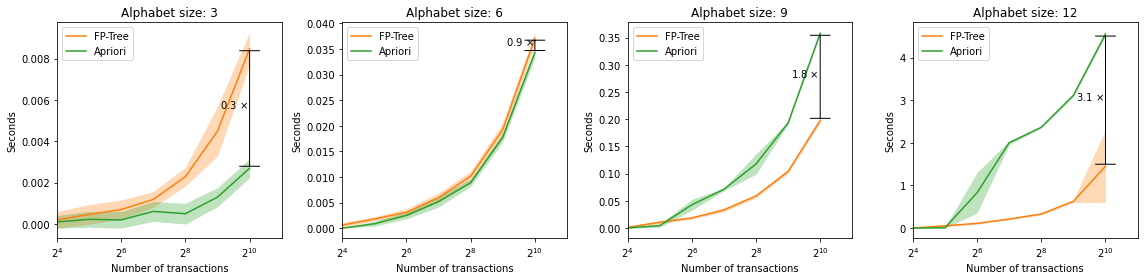

In [119]:
import matplotlib.pyplot as plt

results = np.load('itemsets_runningtimes.npy')
stderrs = np.load('itemsets_stderr.npy')

# Plotting 
transaction_lengths = [2**i for i in range(4, 11)]
alphabet_sizes      = [3, 6, 9, 12] 

n, a, _ = results.shape
res_to_plot = np.transpose(results, (1, 0, 2))
err_to_plot = np.transpose(stderrs, (1, 0, 2))

fig, ax = plt.subplots(1, a, figsize=(4*a, 4))
for i, (res, err) in enumerate(zip(res_to_plot, err_to_plot)):
    ax[i].plot(transaction_lengths, res[:,0], label='FP-Tree', color='C1')
    ax[i].fill_between(transaction_lengths, res[:,0] - err[:,0], res[:,0] + err[:,0], alpha=0.3, linewidth=0 , color='C1')
    
    x = transaction_lengths[-1]
    ax[i].set_xlim((2**4, 2**11))
    ax[i].annotate(text='', xy=(x, res[-1,0]), xytext=(x,res[-1,1]), arrowprops=dict(arrowstyle='|-|'))
    ax[i].annotate(text='%.1f $\\times$'%(res[-1,1]/res[-1,0]), xy=(x-24,  (res[-1,1] / 2 + res[-1,0]/2)), horizontalalignment='right')
    
    ax[i].plot(transaction_lengths, res[:,1], label='Apriori', color='C2')
    ax[i].fill_between(transaction_lengths, res[:,1] - err[:,1], res[:,1] + err[:,1], alpha=0.3, linewidth=0 , color='C2')
    
    ax[i].set_title("Alphabet size: %d" % alphabet_sizes[i])
    ax[i].set_xscale('log', base=2)
    ax[i].legend()
    ax[i].set_xlabel('Number of transactions')
    ax[i].set_ylabel('Seconds')

plt.tight_layout()
    

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>

We observe that, for a dataset with less different labels, the Apriori algorithm is faster than the FP-Growth algorithm. However, for a dataset with a larger set of unique labels, the FP-Growth algorithm is faster than the Apriori algorithm. And this is to be expected, as the Apriori algorithm has to generate all the possible itemsets, and then count the support for each of them. This is a very time consuming process, and therefore, the Apriori algorithm is slower than the FP-Growth algorithm. The FP-Growth algorithm, on the other hand, only has to generate the FP-Tree, and then count the support for each of the itemsets. This is a much faster process, and therefore, the FP-Growth algorithm is faster than the Apriori algorithm. 

******************

# Part 3: Sequence Segmentation and LSH (30 Points)
The Dynamic Programming algorithm for optimally segmenting a sequence $S$ of length $n$ 
into $B$ segments, that we have introduced, is expressed by the following recursive equation:

$$
E(i, b) = \min_{j < i}\left[ E(j, b-1) + Err(j+1, i)\right]
$$

where $Err(j+1, i)$ is the error of a segment that contains items from $j+1$ to $i$.

In this part, you will have to answer some questions on this.

**Note:** 
For those of you, who are not used to analyzing algorithms: by time-complexity and space-complexity, 
we refer to the theoretical computation time and memory usage, respectively, as a function of the problem size, i.e., as a 
function of $n$ and $B$ in Problem 3. We use [Big O notation](https://en.wikipedia.org/wiki/Big_O_notation)
to specify this. You should **not** infer it by implementing it in practice ;-) 
Again, when in doubt, ask on Discord, Blackboard or shoot Jon an email. 

## Task 3.1 Sequence segmentation (20 Points)

************
<span style='color: red'>**These questions are hard. First complete the rest of the exercises and then come back to solve 3.1.**</span>
************


### Task 3.1.1
<span style='color: green'>**\[Describe\]**</span> what is the default space-complexity of this algorithm?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>

The dynamic programming table $E$ is a 2-dimensional table with dimensions $n \times B$. We need to store a value for every combination of sequence length $i$ (from 1 to $n$) and number of segments $b$ (from 1 to $B$). This gives us $n \cdot B$ different combinations, thus the space complexity is $O(nB)$. Assuming that the error term can be calculated on the fly, making it a constant.

******************

### Task 3.1.2 
<span style='color: green'>**\[Describe\]**</span> what happens if we are willing to recompute some tabulated results. Can we then reduce the default space-complexity? _Exactly how_? What is the space-complexity then?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>

If we are willing to recompute some tabulated results, we can reduce the default space-complexity. We can do this by only storing the values for the current row $i$ and the previous minimum row $j$. We can do this as, for each $i$, we want to find the minimum row of all the rows $j$ that came before row $i$. And so the first iteration becomes the minimum also, then the following iterations, we have information about the current minimum and it will never change in this iteration, unless if we encounter a row $i$ that is less than the row $j$, thus making this new minimum row $i$ the new current minimum row $j$, and so on. This means that we only need to store $2B $values for each iteration, giving us a space complexity of $O(B)$.

However, here we must then assume that the error term can be calculated without the information of the other rows.

******************

### Task 3.1.3 
<span style='color: green'>**\[Motivate\]**</span> what is the cost of using the space-efficiency technique described in Task 3.1.2 in terms of time-complexity.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>

The time complexity in the original case is $O(n^2B)$, considering that for each entry $E(i, b)$ we are performing a minimization operation over '$i$' elements and this is done for '$n$' rows and '$B$' columns.

The space-efficiency technique doesn't change the overall time complexity, but it does introduce the possibility of needing to recompute some previously computed values. If we don't store all the computed errors $Err(j+1, i)$ and need to recompute them, this could potentially add another $O(n)$ factor to the time complexity, resulting in a total time complexity of $O(n^3B)$, assuming that computing $Err(j+1, i)$ takes $O(n)$ time. However, if we can compute $Err(j+1, i)$ in constant time or if we also store previously computed errors in a separate table, we can avoid this extra cost and maintain the $O(n^2B)$ time complexity.

******************

### Task 3.1.4 
For the sub-problem of segmenting the $i$-prefix of sequence $S$ into $b$ segments, consider 
    the segment $M(i, b)$ that contains (if such segment exists) the middle item of 
    index $\lfloor \frac{n}{2} \rfloor$. The boundaries of $M(i, b)$ can be detected and tabulated 
    along with each $E(i, b)$ solution. 

<span style='color: green'>**\[Describe\]**</span> a method that reduces the time-complexity burden identified in Task 3.1.3, based on the above observarion. 
    _(hint: use [divide-and-conquer](https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm))_

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.1.5 
<span style='color: green'>**\[Motivate\]**</span> what is the time complexity when using the technique proposed in Task 3.1.4?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 3.2 Min Hashing (6 Points)

In this exercise we will see the **One-pass implementation** of the MinHash signatures.<br>

### Task 3.2.1 
<span style='color: green'>**\[Implement\]**</span> Implement the One-pass algorithm for the MinHash Signatures (and the jaccard simmilarity matrix).

In [ ]:
#C is the Input Matrix (Shingles x Documents)
#J_sim is a jaccard similarity matrix (Documents x Documents)
def jaccard_simmilarity_matrix(C):
    J_sim = None
    ### YOUR CODE STARTS HERE
    
    ### YOUR CODE ENDS HERE
    return J_sim

#C is the Input Matrix (Shingles x Documents)
#no_of_permutations is the how many permutations we will use
#C_new is the Output Matrix (no_of_permutations x Documents)
def one_pass_hashing(C, no_of_permutations):
    C_new = None
    ### YOUR CODE STARTS HERE
    
    ### YOUR CODE ENDS HERE
    return C_new


### Task 3.2.2 

<span style='color: green'>**\[Implement\]**</span> For the matrix below run your implementation for different number of permutations in the range [1,4] and report: a) the Output Matrix C_new and  b) the jaccard similarity matrix of C_new.

In [ ]:
### YOUR CODE HERE

<span style='color: green'>**\[Motivate\]**</span> Suppose we have 4 documents named as X,Y,Z and W and their signatures are given by the input matrix $C$ as:
$$\begin{matrix} X & Y & Z & W \\1 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & 1 & 1\\0 & 0 & 1 & 0 \end{matrix}$$

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.2.3 
Suppose we have two hash functions (permutations) as <br> $h_1(x) = (x + 1) mod 5$ and $h_2(x)=(3x + 1) mod 5$ 
<span style='color: green'>**\[Describe\]**</span> and <span style='color: green'>**\[Compute by Hand\]**</span> the steps of the one-pass implementation.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 3.3 Locality Sensitive Hashing (4 points)

### Task 3.3.1 

<span style='color: green'>**\[Implement\]**</span> code that evaluate the S-curve $1-(1-s^r)^b$ for $s\in [0,1]$ for the following values of $r$ and $b$ 
1. $r = 3$ and $b = 10$
2. $r = 6$ and $b = 20$
3. $r = 5$ and $b = 50$

You can use, or modify, the helper plotting code below. 

In [ ]:
### YOUR CODE HERE

### YOUR CODE HERE

x = np.linspace(0.01,0.99,100)
y = s_curve(5,50)(x)

def plot_function(x,y): 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(x,y, 'r')

    # show the plot
    plt.show()
    
plot_function(x,y)

### Task 3.3.2 

<span style='color: green'>**\[Describe\]**</span> For each of the (r,b) pairs in Task 3.2.1, compute the value of $s$ for which the value of $1-(1-s^r)^b$ is exactly 1/2. How does this value compare with the estimate of $(1/b)^{1/r}$

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************